In [9]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [10]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [11]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [12]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [13]:
# Create a list for holding the cities
cities = []
# Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
len(cities)

589

In [14]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [15]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bc410ec95229b328ec759306d5e17889


In [16]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [17]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | margate
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | amboise
Processing Record 4 of Set 1 | addi ugri
City not found. Skipping...
Processing Record 5 of Set 1 | ngukurr
City not found. Skipping...
Processing Record 6 of Set 1 | yellowknife
Processing Record 7 of Set 1 | amderma
City not found. Skipping...
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | luderitz
Processing Record 11 of Set 1 | magadan
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | katsuyama
Processing Record 14 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 15 of Set 1 | kapaa
Processing Record 16 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 17 of Set 1 | salalah
Processing Record 18 of Set 1 | vaini
Processing Record 19 of Set 1 | dikson
Processing Record 20 of Set 1 | kach

Processing Record 37 of Set 4 | esperance
Processing Record 38 of Set 4 | ponoka
Processing Record 39 of Set 4 | cherskiy
Processing Record 40 of Set 4 | neiafu
Processing Record 41 of Set 4 | hambantota
Processing Record 42 of Set 4 | souillac
Processing Record 43 of Set 4 | lahuachaca
Processing Record 44 of Set 4 | xuzhou
Processing Record 45 of Set 4 | kupino
Processing Record 46 of Set 4 | hayden
Processing Record 47 of Set 4 | huarmey
Processing Record 48 of Set 4 | nome
Processing Record 49 of Set 4 | half moon bay
Processing Record 50 of Set 4 | tabiauea
City not found. Skipping...
Processing Record 1 of Set 5 | yuxia
Processing Record 2 of Set 5 | yumen
Processing Record 3 of Set 5 | bandarbeyla
Processing Record 4 of Set 5 | avarua
Processing Record 5 of Set 5 | alta floresta
Processing Record 6 of Set 5 | ranfurly
Processing Record 7 of Set 5 | isangel
Processing Record 8 of Set 5 | ituni
City not found. Skipping...
Processing Record 9 of Set 5 | patnanungan
Processing Recor

Processing Record 30 of Set 8 | rosario
Processing Record 31 of Set 8 | vila velha
Processing Record 32 of Set 8 | hassan
Processing Record 33 of Set 8 | dickinson
Processing Record 34 of Set 8 | saurimo
Processing Record 35 of Set 8 | beloha
Processing Record 36 of Set 8 | tual
Processing Record 37 of Set 8 | wageningen
Processing Record 38 of Set 8 | san cristobal
Processing Record 39 of Set 8 | pemangkat
Processing Record 40 of Set 8 | kieta
Processing Record 41 of Set 8 | turukhansk
Processing Record 42 of Set 8 | kathu
Processing Record 43 of Set 8 | cabo san lucas
Processing Record 44 of Set 8 | mnogovershinnyy
Processing Record 45 of Set 8 | asau
Processing Record 46 of Set 8 | nam som
Processing Record 47 of Set 8 | pavlivka
Processing Record 48 of Set 8 | porosozero
Processing Record 49 of Set 8 | mindelo
Processing Record 50 of Set 8 | daru
Processing Record 1 of Set 9 | victor harbor
Processing Record 2 of Set 9 | geraldton
Processing Record 3 of Set 9 | rio branco
Processin

Processing Record 20 of Set 12 | shimoni
Processing Record 21 of Set 12 | alotau
City not found. Skipping...
Processing Record 22 of Set 12 | badou
Processing Record 23 of Set 12 | lardos
Processing Record 24 of Set 12 | zlitan
Processing Record 25 of Set 12 | dakar
Processing Record 26 of Set 12 | port moresby
Processing Record 27 of Set 12 | paralimni
Processing Record 28 of Set 12 | gamba
Processing Record 29 of Set 12 | hue
Processing Record 30 of Set 12 | ziarat
Processing Record 31 of Set 12 | shakawe
Processing Record 32 of Set 12 | coahuayana
Processing Record 33 of Set 12 | anadyr
Processing Record 34 of Set 12 | puerto penasco
Processing Record 35 of Set 12 | naryan-mar
Processing Record 36 of Set 12 | dubna
Processing Record 37 of Set 12 | russkaya polyana
Processing Record 38 of Set 12 | ganzhou
Processing Record 39 of Set 12 | torbay
-----------------------------
Data Retrieval Complete      
-----------------------------


In [18]:
len(city_data)

544

In [19]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Margate,51.38,1.39,48.99,87,97,5.99,GB,2020-11-30 19:45:11
1,Mataura,-46.19,168.86,50.00,81,38,4.00,NZ,2020-11-30 19:45:11
2,Amboise,47.41,0.98,37.40,86,100,5.82,FR,2020-11-30 19:40:47
3,Yellowknife,62.46,-114.35,17.60,100,90,12.75,CA,2020-11-30 19:42:51
4,Punta Arenas,-53.15,-70.92,57.20,47,75,47.20,CL,2020-11-30 19:42:05
...,...,...,...,...,...,...,...,...,...
539,Naryan-Mar,67.67,53.09,28.35,97,98,18.66,RU,2020-11-30 19:46:20
540,Dubna,56.73,37.17,33.73,94,100,12.19,RU,2020-11-30 19:46:20
541,Russkaya Polyana,49.42,31.92,30.72,99,100,10.94,UA,2020-11-30 19:46:20
542,Ganzhou,28.82,115.43,46.76,75,90,5.73,CN,2020-11-30 19:46:21


In [20]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']

In [21]:
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Margate,GB,2020-11-30 19:45:11,51.38,1.39,48.99,87,97,5.99
1,Mataura,NZ,2020-11-30 19:45:11,-46.19,168.86,50.00,81,38,4.00
2,Amboise,FR,2020-11-30 19:40:47,47.41,0.98,37.40,86,100,5.82
3,Yellowknife,CA,2020-11-30 19:42:51,62.46,-114.35,17.60,100,90,12.75
4,Punta Arenas,CL,2020-11-30 19:42:05,-53.15,-70.92,57.20,47,75,47.20
...,...,...,...,...,...,...,...,...,...
539,Naryan-Mar,RU,2020-11-30 19:46:20,67.67,53.09,28.35,97,98,18.66
540,Dubna,RU,2020-11-30 19:46:20,56.73,37.17,33.73,94,100,12.19
541,Russkaya Polyana,UA,2020-11-30 19:46:20,49.42,31.92,30.72,99,100,10.94
542,Ganzhou,CN,2020-11-30 19:46:21,28.82,115.43,46.76,75,90,5.73


In [22]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [23]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

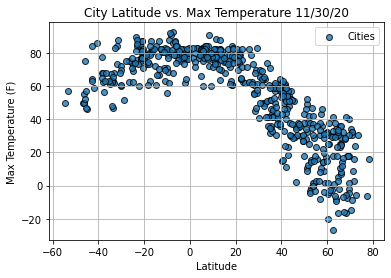

In [36]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.legend()

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

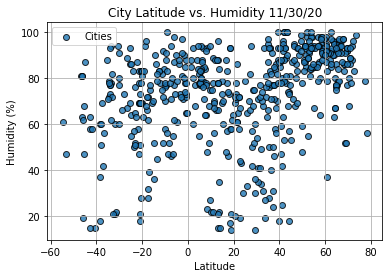

In [39]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.legend()

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

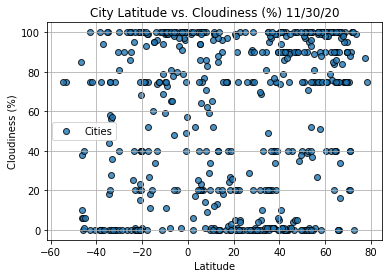

In [41]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.legend()

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

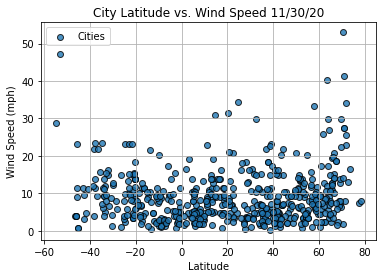

In [42]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.legend()

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()